# threshold & threshold_otsu

## threshold

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

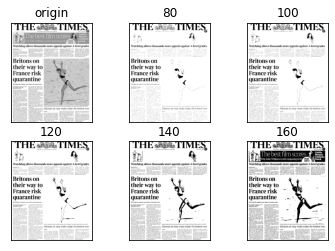

In [28]:
path = './img/newspaper_01.jpg'

img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 기준 이상인 값들은 255로, 이하인 값들은 0으로 바꿔준다 
_,t_bin = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
_,t_bin2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
_,t_bin3 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
_,t_bin4 = cv2.threshold(img,140,255,cv2.THRESH_BINARY)
_,t_bin5 = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

imgs = {'origin':img, '80':t_bin, '100':t_bin2, '120':t_bin3, '140':t_bin4, '160':t_bin5}

for i ,(key,value) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(key)
    # opencv bgr로 색상채널을 가지고 있기때문에 색상채널을 뒤집을 때
    #plt.imshow(value[:,:,::-1])
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])


plt.show()

## threshold otsu

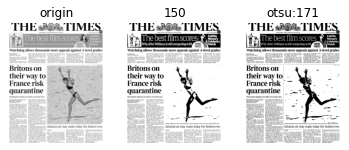

In [29]:
path = './img/newspaper_01.jpg'

img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,t_bin = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
t,t_ots = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imgs = {'origin':img, '150':t_bin, 'otsu:%d'%t:t_ots}

for i ,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    # opencv bgr로 색상채널을 가지고 있기때문에 색상채널을 뒤집을 때
    #plt.imshow(value[:,:,::-1])
    plt.imshow(value,cmap='gray')
    plt.axis('off')
#     plt.xticks([])
#     plt.yticks([])


plt.show()

## adaptive threshold

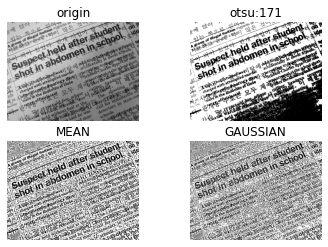

In [50]:
path = './img/newspaper_03.jpg'

# 영역으로 나눌 이웃의 크기(홀수)
blk_size = 9
# 계산된 경계값에서 가감할 상수
C = 1

img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,th1 = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                              cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                              cv2.THRESH_BINARY, blk_size, C)

imgs = {'origin':img, 'otsu:%d'%t:th1, 'MEAN':th2, 'GAUSSIAN':th3}

for i ,(key,value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.axis('off')
# plt.title('key')
# plt.imshow(th2,cmap='gray')
# plt.axis('off')
plt.show()